In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# Задание из методички

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [7]:
y.shape, X.shape

((768,), (768, 8))

In [8]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [9]:
logistic.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [11]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


In [12]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291291]


In [15]:
y_pred = logistic.predict(X)

In [16]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [17]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

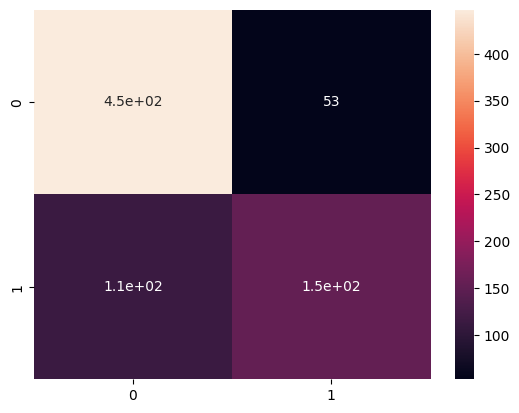

In [18]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [19]:
logistic.score(X, y)

0.7825520833333334

In [21]:
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [22]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
polynomial.score(poly, y)

0.7239583333333334

# Задания для самостоятельной работы

Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [24]:
def model_info(data):
  for i, j in data:
    print(i, j)

data = [("Classes", polynomial.classes_),
        ("Number of features", polynomial.n_features_in_),
        ("Actual number of iterations for all classes", polynomial.n_iter_),
        ("Probability estimates \n", (polynomial.predict_proba(poly))[:3])]
model_info(data)

Classes [0 1]
Number of features 45
Actual number of iterations for all classes [100]
Probability estimates 
 [[0.49606223 0.50393777]
 [0.77807156 0.22192844]
 [0.08285566 0.91714434]]


In [25]:
poly = PolynomialFeatures(6)
poly = poly.fit_transform(X)
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
polynomial.score(poly, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4049479166666667

In [26]:
poly = PolynomialFeatures(10)
poly = poly.fit_transform(X)
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
polynomial.score(poly, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6510416666666666

degree = 2 => 0.7239583333333334

degree = 6 => 0.4049479166666667

degree = 10 => 0.6510416666666666

2)  Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
1.  Метод опорных векторов
- Без ядра
- С линейным ядром
- С гауссовым ядром
- С полиномиальным ядром
2.  Метод ближайших соседей
3. Многослойный перцептрон
4. Дерево решений
5. Наивный байесовский классификатор
6. (*) Другие методы:
- Пассивно-агрессивный классификатор
- Гребневый классификатор
- Случайный лес
- Беггинг
Другие модели по желанию

In [27]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [28]:
X_train = X[:500]
y_train =y[:500]
X_test = X[500:]
y_test = y[500:]

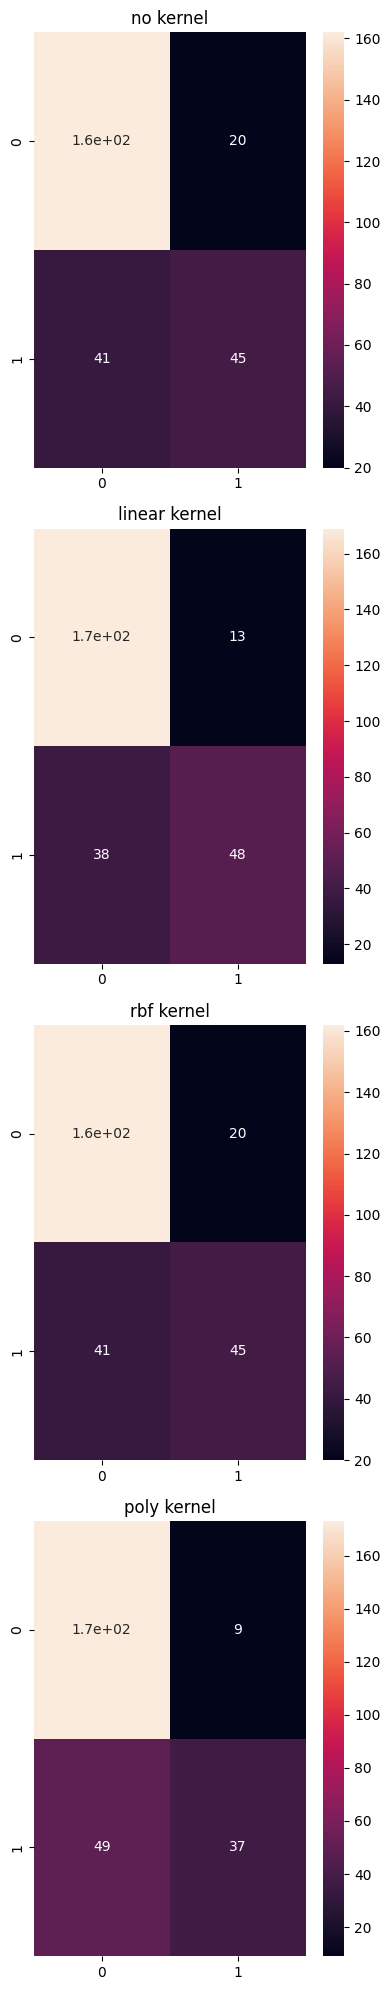

In [30]:
# Метод опорных векторов
f, axs = plt.subplots(4, 1, figsize=(4, 20))

# Без ядра
model1 = svm.SVC()
model1.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model1.predict(X_test)), annot=True, ax=axs[0])
axs[0].set_title("no kernel")
# С линейным ядром
model2 = svm.SVC(kernel='linear')
model2.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model2.predict(X_test)), annot=True, ax=axs[1])
axs[1].set_title("linear kernel")
# С гауссовым ядром
model3 = svm.SVC(kernel='rbf')
model3.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model3.predict(X_test)), annot=True, ax=axs[2])
axs[2].set_title("rbf kernel")
# С полиномиальным ядром
model4 = svm.SVC(kernel='poly')
model4.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model4.predict(X_test)), annot=True, ax=axs[3])
axs[3].set_title("poly kernel")
f.tight_layout()

# метод ближайших соседей

<Axes: >

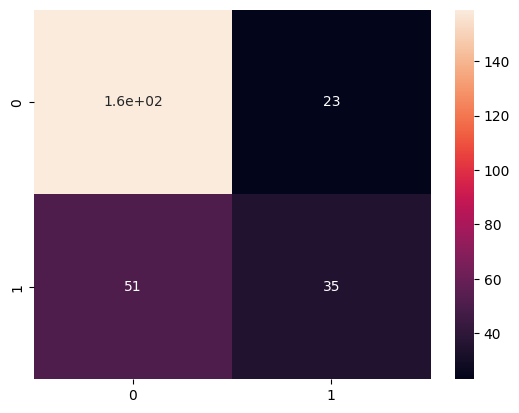

In [32]:

nbrs = KNeighborsClassifier(n_neighbors=4)
nbrs.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, nbrs.predict(X_test)), annot=True)

# Многослойный перцептрон

<Axes: >

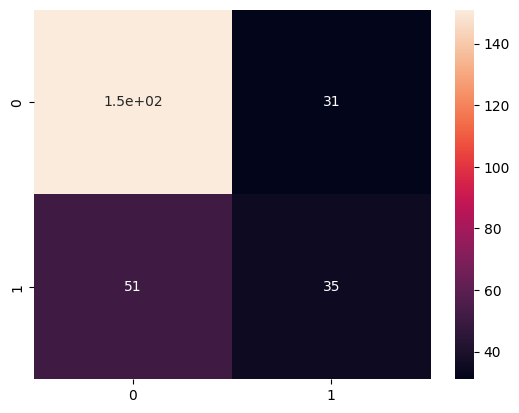

In [33]:
model5 = MLPClassifier()
model5.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, model5.predict(X_test)), annot=True)

# Дерево решений

<Axes: >

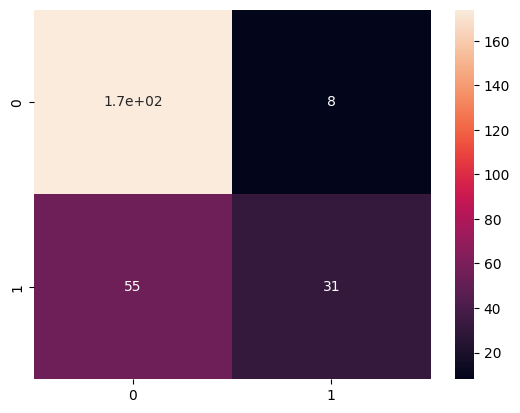

In [34]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)), annot=True)

# Наивный байесовский классификатор

<Axes: >

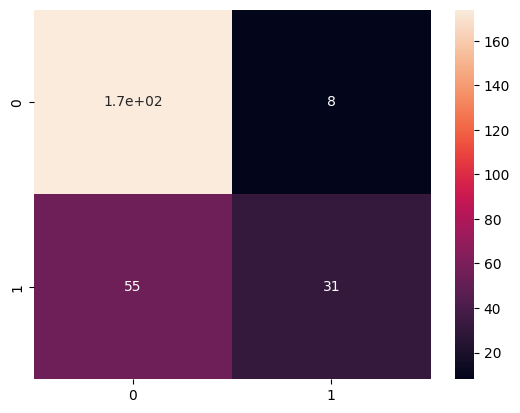

In [35]:
bies = GaussianNB()
bies.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)), annot=True)

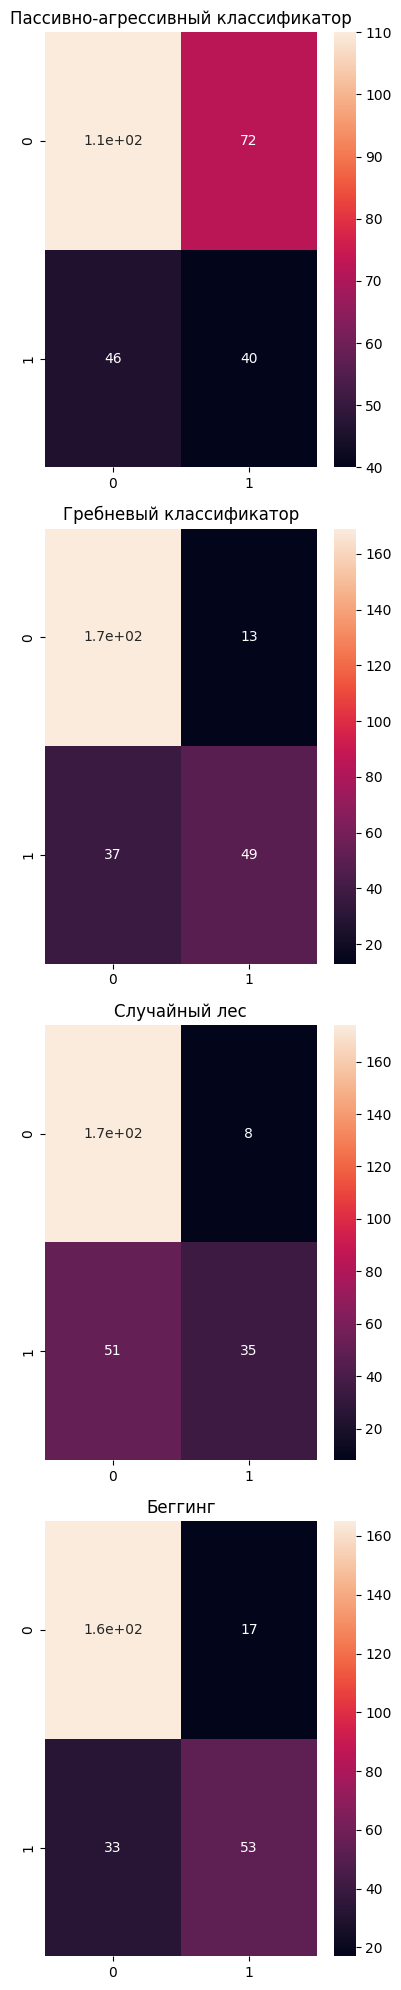

In [38]:
# Другие модели
f, axs = plt.subplots(4, 1, figsize=(4,20))

# Пассивно-агрессивный классификатор
cl1 = PassiveAggressiveClassifier(max_iter=1000)
cl1.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl1.predict(X_test)), annot=True, ax=axs[0])
axs[0].set_title("Пассивно-агрессивный классификатор")
# Гребневый классификатор
cl2 = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
cl2.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl2.predict(X_test)), annot=True, ax=axs[1])
axs[1].set_title("Гребневый классификатор")
# Случайный лес
cl3 = RandomForestClassifier(max_depth=2, random_state=0)
cl3.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl3.predict(X_test)), annot=True, ax=axs[2])
axs[2].set_title("Случайный лес")
# Беггинг
cl4 = BaggingClassifier()
cl4.fit(X_train, y_train)
sns.heatmap(metrics.confusion_matrix(y_test, cl4.predict(X_test)), annot=True, ax=axs[3])
axs[3].set_title("Беггинг")
f.tight_layout()

3) Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [43]:
def learning(X_train, y_train, X_test, y_test):
    text = ["Метод опорных векторов (Без ядра)", "Метод опорных векторов (С линейным ядром)",
            "Метод опорных векторов (С гауссовым ядром)", "Метод опорных векторов (С полиномиальным ядром)",
            "Метод ближайших соседей", "Многослойный перцептрон", "Дерево решений", "Наивный байесовский классификатор",
            "Пассивно-агрессивный классификатор", "Гребневый классификатор", "Случайный лес", "Беггинг"]
    models = [svm.SVC(),svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'),
              svm.SVC(kernel='poly'),  KNeighborsClassifier(n_neighbors=4),
              MLPClassifier(), tree.DecisionTreeClassifier(max_depth=3),
              GaussianNB(), PassiveAggressiveClassifier(max_iter=1000),
              RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
              RandomForestClassifier(max_depth=2, random_state=0),
              BaggingClassifier()]


    scores = []


    for i in models:
      i.fit(X_train, y_train)
      scores.append(round(metrics.accuracy_score(y_test, i.predict(X_test)),3))


    return pd.DataFrame({"Models" : text, "Score": scores})


learning(X_train, y_train, X_test, y_test)

,Models,Score
0,Метод опорных векторов (Без ядра),0.772
1,Метод опорных векторов (С линейным ядром),0.810
2,Метод опорных векторов (С гауссовым ядром),0.772
3,Метод опорных векторов (С полиномиальным ядром),0.784
4,Метод ближайших соседей,0.724
5,Многослойный перцептрон,0.683
6,Дерево решений,0.765
7,Наивный байесовский классификатор,0.784
8,Пассивно-агрессивный классификатор,0.687
9,Гребневый классификатор,0.813


4) Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [44]:
from sklearn import datasets
from sklearn.utils import shuffle


In [45]:
data = datasets.load_iris()


In [46]:
df_x = pd.DataFrame(data['data'])
df_y = pd.DataFrame(data['target'])
df = pd.concat([df_x, df_y], axis=1)
df.head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df = shuffle(df)
df.head()

,0,1,2,3,0
144,6.7,3.3,5.7,2.5,2
133,6.3,2.8,5.1,1.5,2
25,5.0,3.0,1.6,0.2,0
89,5.5,2.5,4.0,1.3,1
10,5.4,3.7,1.5,0.2,0


In [48]:
X_train =df.iloc[:80,:-1]
X_test =df.iloc[80:,:-1]
y_train = df.iloc[:80,-1]
y_test = df.iloc[80:,-1]

In [49]:
learning(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Models,Score
0,Метод опорных векторов (Без ядра),0.957
1,Метод опорных векторов (С линейным ядром),0.986
2,Метод опорных векторов (С гауссовым ядром),0.957
3,Метод опорных векторов (С полиномиальным ядром),0.971
4,Метод ближайших соседей,0.971
5,Многослойный перцептрон,0.971
6,Дерево решений,0.971
7,Наивный байесовский классификатор,0.986
8,Пассивно-агрессивный классификатор,0.814
9,Гребневый классификатор,0.886
